In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.config import DADOS_LIMPOS
from src.graficos import PALETTE, SCATTER_ALPHA

sns.set_theme(palette="bright", style="white")

In [2]:
df = pd.read_parquet(DADOS_LIMPOS)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216


In [3]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
17559,-121.089996,39.480000,25,1665,374,845,330,1.5603,78100,INLAND,2,5.045455,2.560606,0.224625
17560,-121.209999,39.490002,18,697,150,356,114,2.5568,77100,INLAND,2,6.114035,3.122807,0.215208
17561,-121.220001,39.430000,17,2254,485,1007,433,1.7000,92300,INLAND,2,5.205543,2.325635,0.215173
17562,-121.320000,39.430000,18,1860,409,741,349,1.8672,84700,INLAND,2,5.329513,2.123209,0.219892
17563,-121.239998,39.369999,16,2785,616,1387,530,2.3886,89400,INLAND,2,5.254717,2.616981,0.221185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float32 
 1   latitude                  17564 non-null  float32 
 2   housing_median_age        17564 non-null  int8    
 3   total_rooms               17564 non-null  int16   
 4   total_bedrooms            17564 non-null  int16   
 5   population                17564 non-null  int16   
 6   households                17564 non-null  int16   
 7   median_income             17564 non-null  float32 
 8   median_house_value        17564 non-null  int32   
 9   ocean_proximity           17564 non-null  category
 10  median_income_cat         17564 non-null  int64   
 11  rooms_per_household       17564 non-null  float32 
 12  population_per_household  17564 non-null  float32 
 13  bedrooms_per_room         17564 non-null  floa

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
count,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000
mean,-119.509995,35.602200,27.276873,2510.510875,515.378046,1386.315019,483.979447,3.696602,189570.803803,2.952460,5.253923,2.934664,0.211643
std,1.984252,2.147250,11.323957,1593.977891,320.848886,844.889138,295.559700,1.541925,95971.413796,1.006761,1.134085,0.691408,0.048315
min,-124.300003,32.540001,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000,1.714286,0.750000,0.113535
25%,-121.599998,33.919998,18.000000,1464.750000,300.000000,816.000000,287.000000,2.547375,114300.000000,2.000000,4.446466,2.470259,0.176919
50%,-118.459999,34.240002,28.000000,2131.000000,438.000000,1196.000000,415.000000,3.479200,171400.000000,3.000000,5.205450,2.852657,0.203465
75%,-117.980003,37.669998,36.000000,3124.000000,643.000000,1738.000000,605.000000,4.622525,243800.000000,4.000000,5.961016,3.306427,0.239151
max,-114.550003,41.950001,51.000000,11026.000000,2205.000000,5804.000000,1979.000000,10.594100,500000.000000,5.000000,10.352942,5.392954,0.406295


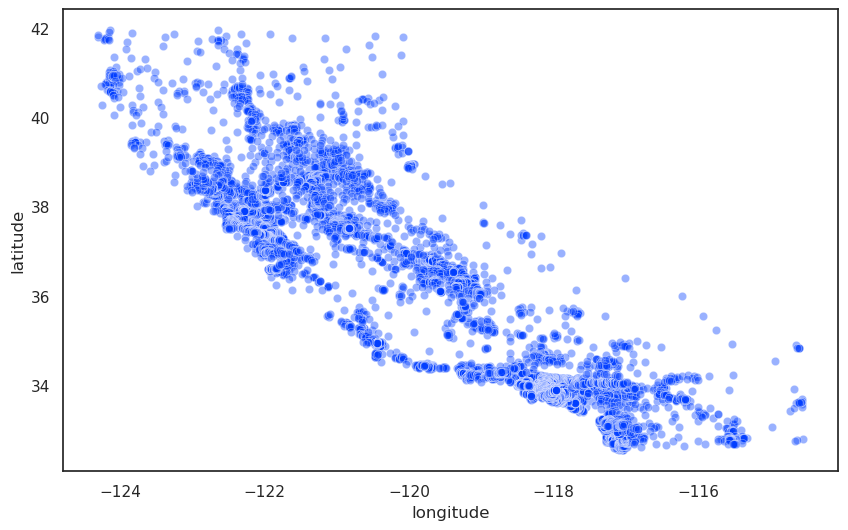

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df, x="longitude", y="latitude", ax=ax, alpha=SCATTER_ALPHA)

plt.show()

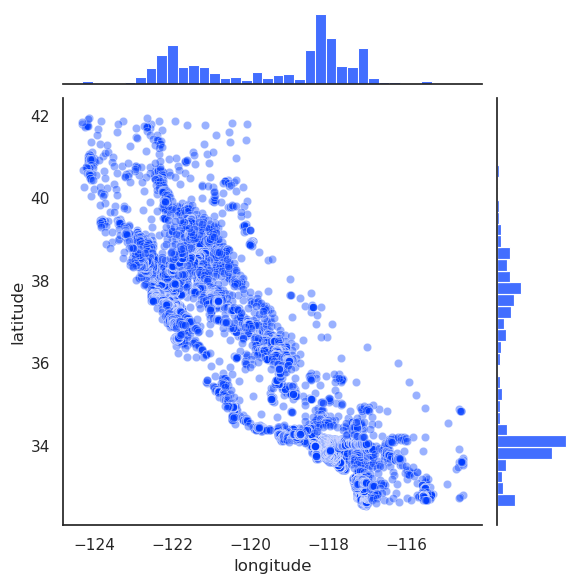

In [7]:
sns.jointplot(data=df, x="longitude", y="latitude", alpha=SCATTER_ALPHA)

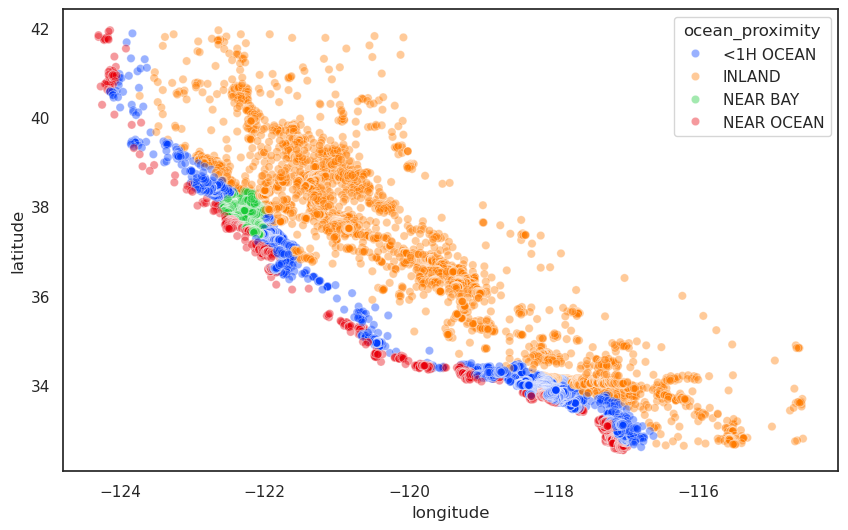

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df, x="longitude", y="latitude", ax=ax, alpha=SCATTER_ALPHA, hue="ocean_proximity")

plt.show()

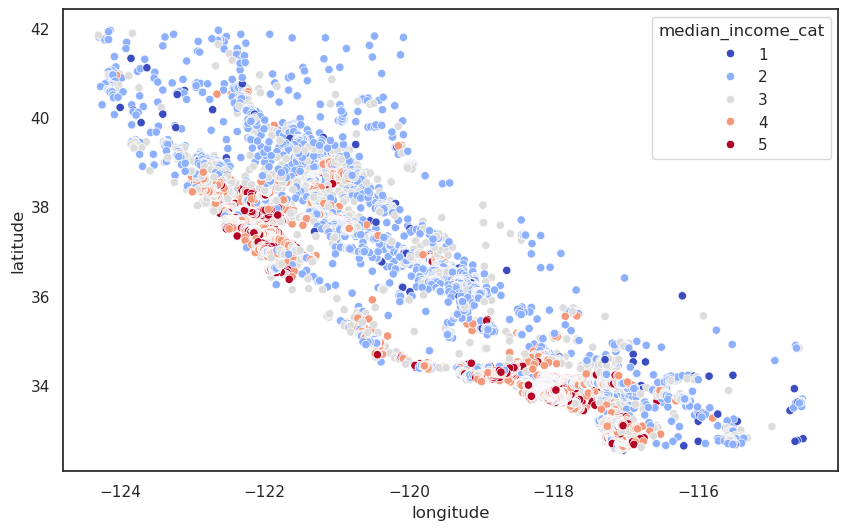

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df, x="longitude", y="latitude", ax=ax, alpha=1, hue="median_income_cat", palette=PALETTE)

plt.show()

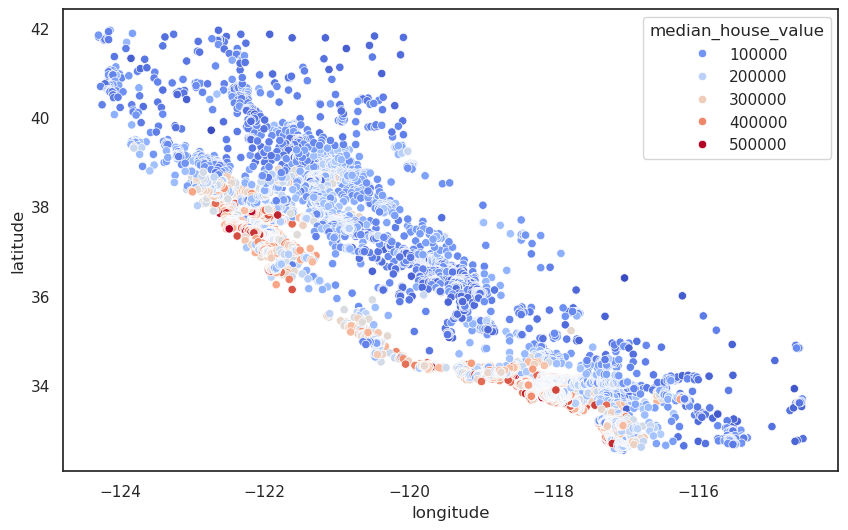

In [10]:
# Não é o ideal
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df, x="longitude", y="latitude", ax=ax, alpha=1, hue="median_house_value",palette=PALETTE)

plt.show()

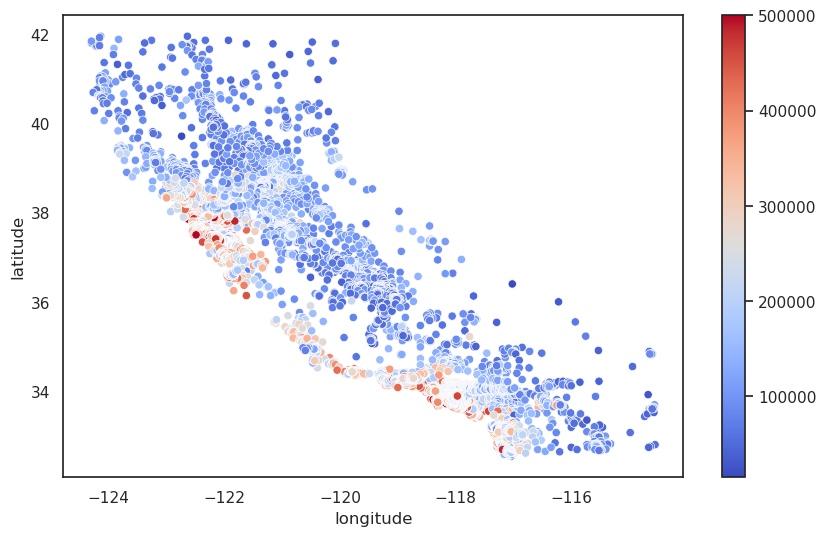

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

norm_median_house_value = plt.Normalize(df["median_house_value"].min(), df["median_house_value"].max())
sm_median_house_value = plt.cm.ScalarMappable(norm=norm_median_house_value, cmap=PALETTE)

sns.scatterplot(data=df, x="longitude", y="latitude", ax=ax, alpha=1, hue="median_house_value",palette=PALETTE)

ax.get_legend().remove()

fig.colorbar(sm_median_house_value, ax=ax)

plt.show()